# Monte Carlo Simulator Scenarios

### Import classes

In [1]:
import pandas as pd
from montecarlo import (
    Die,
    Game,
    Analyzer
)

### Scenario 1: A 2-headed coin

<AxesSubplot:xlabel='game'>

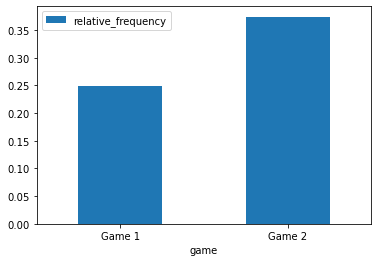

In [2]:
faces = ['H', 'T']
# Fair coin uses the default weight of 1 for all faces
fair_coin = Die(faces = faces)

# Unfair coin has one face with a weight of 5
unfair_coin = Die(faces = faces)
unfair_coin.change_weight(face = 'H', weight = 5)

total_rolls = 1000

# A Game that uses 3 fair dice. Rolls 1000 times
game_1 = Game(dice = [fair_coin] * 3)
game_1.play(rolls = total_rolls)

# A Game that uses 2 unfair dice and 1 fair dice. Rolls 1000 times
game_2 = Game(dice = ([unfair_coin] * 2) + [fair_coin])
game_2.play(rolls = total_rolls)

# Use an Analyzer for each Game to compute the relative frequency of jackpots – getting either all Hs or all Ts
# Relative frequency is computed as the number of jackpots over the total number of rolls
analyzer_1 = Analyzer(game = game_1)
game_1_jackpot = analyzer_1.jackpot()
game_1_relative_frequency = game_1_jackpot / total_rolls

analyzer_2 = Analyzer(game = game_2)
game_2_jackpot = analyzer_2.jackpot()
game_2_relative_frequency = game_2_jackpot / total_rolls

# Compare the results in a bar chart
results_df = pd.DataFrame({
    'game': ['Game 1', 'Game 2'],
    'relative_frequency': [game_1_relative_frequency, game_2_relative_frequency]
})
results_df.plot.bar(x = 'game', y = 'relative_frequency', rot = 0)

### Scenario 2: A 6-sided die

<AxesSubplot:xlabel='game'>

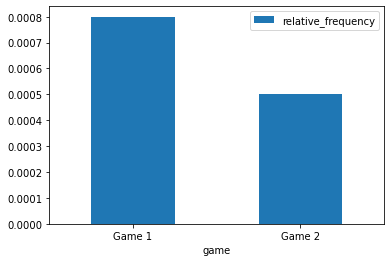

In [6]:
faces = range(1, 7)
fair_die = Die(faces = faces)

unfair_die_type_1 = Die(faces = faces)
unfair_die_type_1.change_weight(face = 6, weight = 5)

unfair_die_type_2 = Die(faces = faces)
unfair_die_type_2.change_weight(face = 1, weight = 5)

total_rolls = 10000

game_1 = Game(dice = [fair_die] * 5)
game_1.play(rolls = total_rolls)

game_2 = Game(dice = ([unfair_die_type_1] * 2) + [unfair_die_type_2] + ([fair_die] * 2))
game_2.play(rolls = total_rolls)

analyzer_1 = Analyzer(game = game_1)
game_1_jackpot = analyzer_1.jackpot()
game_1_relative_frequency = game_1_jackpot / total_rolls

analyzer_2 = Analyzer(game = game_2)
game_2_jackpot = analyzer_2.jackpot()
game_2_relative_frequency = game_2_jackpot / total_rolls

results_df = pd.DataFrame({
    'game': ['Game 1', 'Game 2'],
    'relative_frequency': [game_1_relative_frequency, game_2_relative_frequency]
})
results_df.plot.bar(x = 'game', y = 'relative_frequency', rot = 0)